In [6]:
import numpy  as np
import healpy as hp
import time

import sys
#sys.path
sys.path.append('/home/jthwaites/FRB/skylab_csky_comp/')

In [37]:
from skylab.priors        import SpatialPrior
from config_GW            import config
from scipy.optimize       import curve_fit
from skylab.ps_injector   import PointSourceInjector
from scipy.stats          import chi2

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

#import csky as cy

In [11]:
mpl.rcParams['font.size'] = 20
import setup
import chime_localizations as loc

Setting up Analysis for:
GFU_for_2011_2012_2013_2014_2015_2016_2017_2018_2019
Setting up GFU_for_2011_2012_2013_2014_2015_2016_2017_2018_2019...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2011_MC.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2011_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2012_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2013_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2014_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2015_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2016_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2017_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2018_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/IC86_2019_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/GRL/IC86_2011_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p06/GRL/IC86_2012_data.npy ...
Reading /

In [17]:
###################### CONFIGURE LLH  ########################
seasons = ['GFU_v002p06','IC86, 2011-2018']
time_window = 20*86400 # in days
erange  = [0,10]
index = 2.
nside=512

############# FRB SKYMAP ###############
frbs=setup.load_frbs(spatial_priors=True)
#spatial prior: use FRB20190416A, dec=33.3
wn=np.where(frbs['src']=='FRB20190416A')
wn=wn[0][0] #want only one of the bursts

### Read map and get probabilities
frb_probs, msk=loc.make_healpix_map('FRB20190416A', new_nside=nside, max_cl=0.9997)

src=setup.sources(20*84600., frbs['mjd'].values[wn], frbs['ra_deg'].values[wn], 
                  frbs['dec_deg'].values[wn])
time_mask = [time_window/2, src['mjd']]

sum of map probabilities: 1.00000


In [ ]:
### Set up spatial prior to be used in scan
spatial_prior = SpatialPrior(frb_probs,allow_neg=True,interpolated_ts_norm=True)

"""Keys for spatial prior in skylab
p : np.ndarray, list of np.ndarray
    Healpix map(s) in the form of a numpy array(s) where each entry
    represents the probability for finding a point source at each
    pixel location.
log_p : np.ndarray, list of np.ndarray
    Natural logarithm of 'p' attribute
nprior : int
    Number of prior maps. One source will be injected for each
    prior map during sample()
nside : int
    Nside of the prior map
npix : int
    Number of pixels in the prior map
pixels : list
    List of pixel id numbers in map
ts_norm : list
    Normalization of the TS term for the prior(s). This equals
    the log of the max prior value and is subtracted from
    log(prior) under the ts() function to ensure the prior
    always acts as a penalty term <= 0.
"""

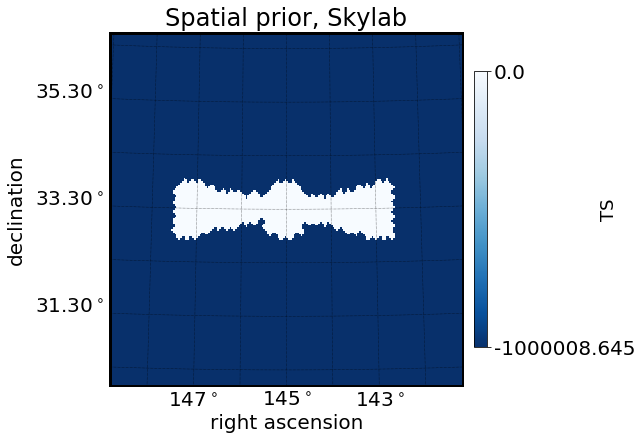

In [52]:
"""Maps for spatial prior visualization"""
prior=spatial_prior.log_p[0]-spatial_prior.ts_norm
setup.plot_zoom(prior, src['ra'][0], src['dec'][0], contour_scan=False, 
                title='Spatial prior, Skylab',
                reso=2., col_label=r"TS", cmap='Blues')

In [47]:
llh = config(seasons,ncpu=7, days=20,timescramble=True,
             time_mask=time_mask, poisson=True)

In [49]:
?llh

In [24]:
val = llh.scan(0.0,0.0, scramble = True, seed = 1,spatial_prior=spatial_prior,
                    time_mask = time_mask, pixel_scan=[nside,3.0]) #mask in pixel scan

/mnt/lfs7/user/jthwaites/skylab/skylab/ps_llh.py:905: RuntimeWarning: invalid value encountered in greater
  mask = alpha > aval
Process Process-67:
Traceback (most recent call last):
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/utils.py", line 1342, in wrapper
    val = [func(*a[0], **a[1]) for a in args]
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/utils.py", line 1342, in <listcomp>
    val = [func(*a[0], **a[1]) for a in args]
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/base_llh.py", line 2101, in fit_source_wrapper
    **kwargs
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/base_llh.py", line 1636, in fit_source
    tmp_results = self.maximize_ts(fixed=fixe

  File "/mnt/lfs7/user/jthwaites/skylab/skylab/llh_models.py", line 1368, in weight
    S0 = self._spline_eval(self._w_spline_dict[(("gamma", g0), )], ev)
KeyError: (('gamma', nan),)
/mnt/lfs7/user/jthwaites/skylab/skylab/ps_llh.py:905: RuntimeWarning: invalid value encountered in greater
  mask = alpha > aval
Process Process-64:
Traceback (most recent call last):
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/utils.py", line 1342, in wrapper
    val = [func(*a[0], **a[1]) for a in args]
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/utils.py", line 1342, in <listcomp>
    val = [func(*a[0], **a[1]) for a in args]
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/base_llh

  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/ps_llh.py", line 987, in <listcomp>
    w = [self.llh_model.weight(self._events, **params[i]) for i in params]
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/llh_models.py", line 1368, in weight
    S0 = self._spline_eval(self._w_spline_dict[(("gamma", g0), )], ev)
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/utils.py", line 1342, in wrapper
    val = [func(*a[0], **a[1]) for a in args]
KeyError: (('gamma', nan),)
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/utils.py", line 1342, in <listcomp>
    val = [func(*a[0], **a[1]) for a in args]
  File "/mnt/lfs7/user/jthwaites/skylab/skylab/base_llh.py", line 2101, in fit_so

KeyboardInterrupt: 

In [ ]:
val

In [ ]:
"""multiple trials: inc later
### Set range of for loop so that multiple jobs 
### on the cluster will still all have unique 
### seeds
#ntrials = args.ntrials
ntrials=1000 #raamis default
stop = ntrials * (args.pid+1)
start = stop-ntrials

tsList = []
for i in range(start,stop):
    val = llh.scan(0.0,0.0, scramble = True, seed = i,spatial_prior=spatial_prior,
                    time_mask = time_mask, pixel_scan=[nside,3.0]) #mask in pixel scan
    try:
        tsList.append(val['TS_spatial_prior_0'].max())
    except ValueError:
        tsList.append(-np.inf)
#np.save('/home/rhussain/icecube/dump/gw%s/bkgTrials/maxTS_%s.npy' 
    %(args.gw,args.pid), tsList)"""